In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import Imputer
from sklearn import metrics

def silent_remove(arr,val):
    if val in arr:
        arr.remove(val)
        
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)        
    
df = pd.read_csv("d:/WorkFolder/pima-data/pima-data.csv")
bool_map = {True:1, False:0}
df["diabetes_val"] = df["diabetes"].map(bool_map)

feature_col_names = [n for n in df.columns]
silent_remove(feature_col_names, "diabetes")
silent_remove(feature_col_names, "diabetes_val")
predicted_class_names = ["diabetes_val"]

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
def test_algo(algo, X_train, X_test, Y_train, Y_test):
    model = algo.fit(X_train, Y_train.ravel())
    
    nb_predict_train = model.predict(X_train)
    score = metrics.accuracy_score(Y_train, nb_predict_train)
    print(score)
    score = metrics.recall_score(Y_train, nb_predict_train)
    print(score)
    
    nb_predict_test = model.predict(X_test)
    score = metrics.accuracy_score(Y_test, nb_predict_test)
    print(score)
    score = metrics.recall_score(Y_test, nb_predict_test)
    print(score)

In [2]:
df.corr(method="kendall")

# ‘pearson’, ‘kendall’, ‘spearman’

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes,diabetes_val
num_preg,1.000000,0.091323,0.135440,-0.064401,-0.096417,0.004183,-0.029959,0.458272,-0.064401,0.170370,0.170370
glucose_conc,0.091323,1.000000,0.159961,0.039046,0.163645,0.155862,0.061871,0.196510,0.039046,0.390565,0.390565
diastolic_bp,0.135440,0.159961,1.000000,0.094868,-0.003682,0.205222,0.019448,0.246056,0.094868,0.119206,0.119206
thickness,-0.064401,0.039046,0.094868,1.000000,0.420066,0.331532,0.126457,-0.044754,1.000000,0.076297,0.076297
insulin,-0.096417,0.163645,-0.003682,0.420066,1.000000,0.141587,0.161652,-0.080176,0.420066,0.058531,0.058531
bmi,0.004183,0.155862,0.205222,0.331532,0.141587,1.000000,0.094644,0.088678,0.331532,0.253676,0.253676
diab_pred,-0.029959,0.061871,0.019448,0.126457,0.161652,0.094644,1.000000,0.028042,0.126457,0.143359,0.143359
age,0.458272,0.196510,0.246056,-0.044754,-0.080176,0.088678,0.028042,1.000000,-0.044754,0.257363,0.257363
skin,-0.064401,0.039046,0.094868,1.000000,0.420066,0.331532,0.126457,-0.044754,1.000000,0.076297,0.076297
diabetes,0.170370,0.390565,0.119206,0.076297,0.058531,0.253676,0.143359,0.257363,0.076297,1.000000,1.000000


In [28]:
df.corr(method="spearman")


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.130734,0.185127,-0.085222,-0.126723,0.000132,-0.043242,0.607216,-0.085222,0.198689
glucose_conc,0.130734,1.000000,0.235191,0.060022,0.213206,0.231141,0.091293,0.285045,0.060022,0.475776
diastolic_bp,0.185127,0.235191,1.000000,0.126486,-0.006771,0.292870,0.030046,0.350895,0.126486,0.142921
thickness,-0.085222,0.060022,0.126486,1.000000,0.541000,0.443615,0.180390,-0.066795,1.000000,0.089728
insulin,-0.126723,0.213206,-0.006771,0.541000,1.000000,0.192726,0.221150,-0.114213,0.541000,0.066472
bmi,0.000132,0.231141,0.292870,0.443615,0.192726,1.000000,0.141192,0.131186,0.443615,0.309707
diab_pred,-0.043242,0.091293,0.030046,0.180390,0.221150,0.141192,1.000000,0.042909,0.180390,0.175353
age,0.607216,0.285045,0.350895,-0.066795,-0.114213,0.131186,0.042909,1.000000,-0.066795,0.309040
skin,-0.085222,0.060022,0.126486,1.000000,0.541000,0.443615,0.180390,-0.066795,1.000000,0.089728
diabetes,0.198689,0.475776,0.142921,0.089728,0.066472,0.309707,0.175353,0.309040,0.089728,1.000000


In [33]:
df.isnull().values.any()

False

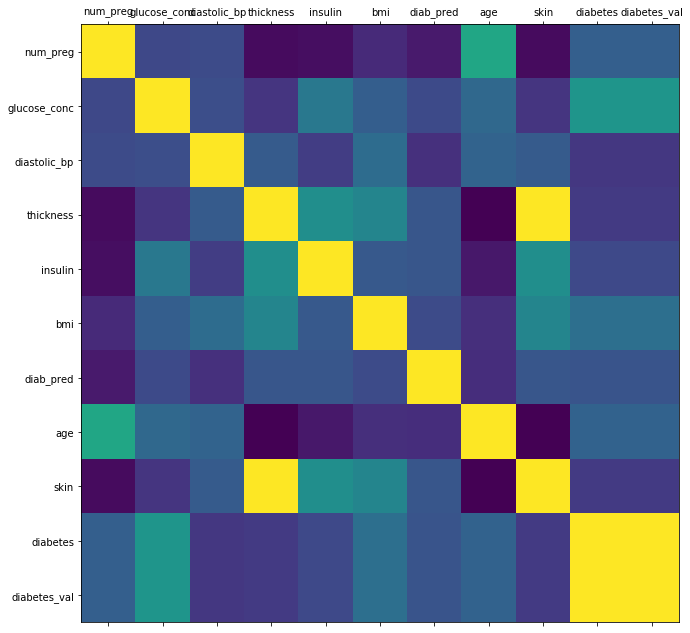

In [3]:
plot_corr(df)

In [4]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes,diabetes_val
0,6,148,72,35,0,33.6,0.627,50,1.3790,True,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,False,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,True,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,False,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,True,1


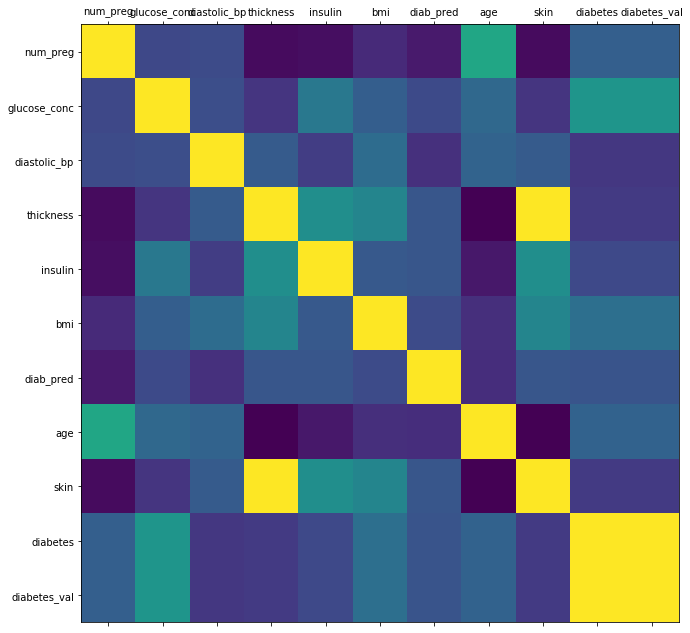

In [13]:
plot_corr(df)

In [5]:
df["diabetes_val"].value_counts()

0    500
1    268
Name: diabetes_val, dtype: int64

In [6]:
x = df[feature_col_names].values
y = df[predicted_class_names].values
split_test_size = 0.30

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=split_test_size, random_state=42)

In [8]:
Y_train.shape

(537, 1)

In [9]:
fill_0 = Imputer(missing_values=0, strategy="mean", axis=0)

In [10]:
X_train_clean = fill_0.fit_transform(X_train)
X_test_clean = fill_0.fit_transform(X_test)

In [11]:
from sklearn.naive_bayes import GaussianNB

In [18]:
nb_model = GaussianNB()

In [19]:
test_algo(nb_model, X_train_clean, X_test_clean, Y_train, Y_test)

0.754189944134
0.595744680851
0.722943722944
0.6375


In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rf_model = RandomForestClassifier(random_state=42)

In [22]:
test_algo(rf_model, X_train_clean, X_test_clean, Y_train, Y_test)

0.988826815642
0.978723404255
0.692640692641
0.6


In [23]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C=0.7, random_state = 42)


In [24]:
test_algo(lr_model, X_train_clean, X_test_clean, Y_train, Y_test)

0.772811918063
0.537234042553
0.744588744589
0.55


In [25]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs = 1, random_state = 42, Cs = 3, cv = 10, refit = False, class_weight = "balanced")

In [26]:
test_algo(lr_cv_model, X_train_clean, X_test_clean, Y_train, Y_test)

0.772811918063
0.739361702128
0.709956709957
0.6875
